<h1 align='center'>Data Science Analysis</h1>
<h1 align='center'>Assignment 8</h1>
<h2 align='center'>Pushkal Mishra</h2>
<h2 align='center'>EE20BTECH11042</h2>

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astroML.correlation import bootstrap_two_point_angular

# Question 1

In [2]:
def compute_two_point_correlation(data, col1, col2, method, N_bootstraps, bin_min, bin_max, n_points):
    
    bins = 10 ** np.linspace(np.log10(bin_min), np.log10(bin_max), n_points)
    results = [bins]

    for d in [data]:
        results += bootstrap_two_point_angular(d[col1],
                                               d[col2],
                                               bins = bins,
                                               method = method,
                                               Nbootstraps = N_bootstraps)
    
    return results

In [3]:
q1_data = pd.read_csv('q1_data.csv', sep = '\s+')

q1_data = q1_data[q1_data['r-mag'] > 17]
q1_data = q1_data[q1_data['r-mag'] < 20]
q1_data = q1_data[q1_data['spread_model_err'] > 0.002]

In [4]:
np.random.seed(11042)

results = compute_two_point_correlation(q1_data, 'RA', 'DEC', 'landy-szalay', 10, 1 / 60.0, 1, 16)
bins, corr, corr_error, bootstraps = results

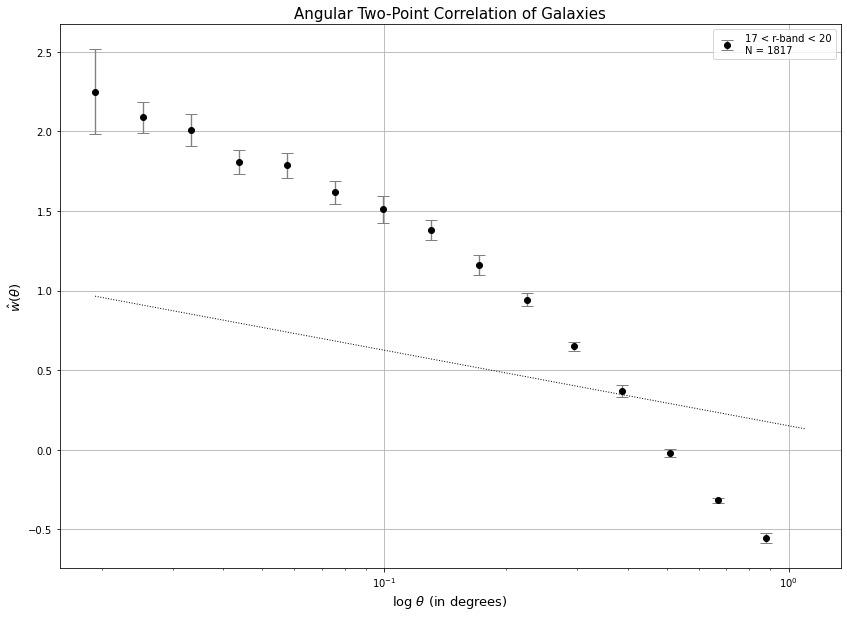

In [5]:
bin_centers = 0.5 * (bins[1 : ] + bins[ : -1])
label = r"17 < r-band < 20" + f"\nN = {len(q1_data)}"
t = np.array([np.min(bin_centers), 1.1])

fig = plt.figure(figsize = (14, 10))

plt.errorbar(bin_centers, corr, corr_error, fmt = "ok", lw = 1.35, capsize = 6, ecolor ="gray", label = label)
plt.plot(t, (10 ** t) ** -0.8, ':k', linewidth=1)

plt.xscale('log')
plt.ylabel(r"$\hat{w}(\theta)$", size = 13)
plt.xlabel(r"log $\theta$ (in degrees)", size = 13)
plt.title("Angular Two-Point Correlation of Galaxies", size = 15)

plt.legend()
plt.grid()
plt.show()

Here we assume that the Angular Two-Point correlation follows the Power law and is proportional to $\theta^{-0.8}$ and the dotted lines are added as a guide to the eye.